___
# K-Means algorithm examples notebook 
___

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from typing import Tuple

# Set default style for plots
plt.style.use("bmh")

___
## Dummy example #1

### Step 1: Getting Started with Our Data

To demonstrate how clustering works, we’ve generated a simple, fictional dataset that mimics real-world business data—think customer behavior based on two measurable features. By keeping it two-dimensional, we’ll be able to visualize everything clearly and focus on the *concepts*, not the complexity.

In [3]:
def generate_dummy_data(
    n_samples: int = 300,
    n_features: int = 2,
    n_clusters: int = 3,
    cluster_std: float = 1.0,
    random_state: int = 42,
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generates a synthetic dataset for clustering using make_blobs.

    Args:
        n_samples (int): Number of data points to generate.
        n_features (int): Number of features per data point (must be 2 for visualization purposes).
        n_clusters (int): Number of clusters to simulate.
        cluster_std (float): Standard deviation of the clusters (controls overlap).
        random_state (int): Random seed for reproducibility.

    Returns:
        Tuple[np.ndarray, np.ndarray]: A tuple containing the feature matrix (X) and the true cluster labels (y).
    """
    X, y = make_blobs(
        n_samples=n_samples,
        n_features=n_features,
        centers=n_clusters,
        cluster_std=cluster_std,
        random_state=random_state,
    )
    return X, y


# Generate the dataset
X, y_true = generate_dummy_data()

# Convert to DataFrame for easier handling and visualization
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["True Cluster"] = y_true

# Display the first few rows
df.head()

Feature 1  Feature 2  True Cluster
0  -7.338988  -7.729954             2
1  -7.740041  -7.264665             2
2  -1.686653   7.793442             0
3   4.422198   3.071947             1
4  -8.917752  -7.888196             2

### Step 2: Visualizing the Data

On the **left**, we see our raw dataset—just a cloud of points representing individual "customers" (or other business entities), each described by two features. At this point, we don’t know anything about how these points might be related.

On the **right**, we’ve revealed the "true" groupings (which we secretly know because this is simulated data). This helps us visualize that there *are* natural clusters in the data—our goal with K-Means is to discover these groupings **without** being told what they are.

This is exactly what clustering is about: finding patterns and structure in unlabeled data.


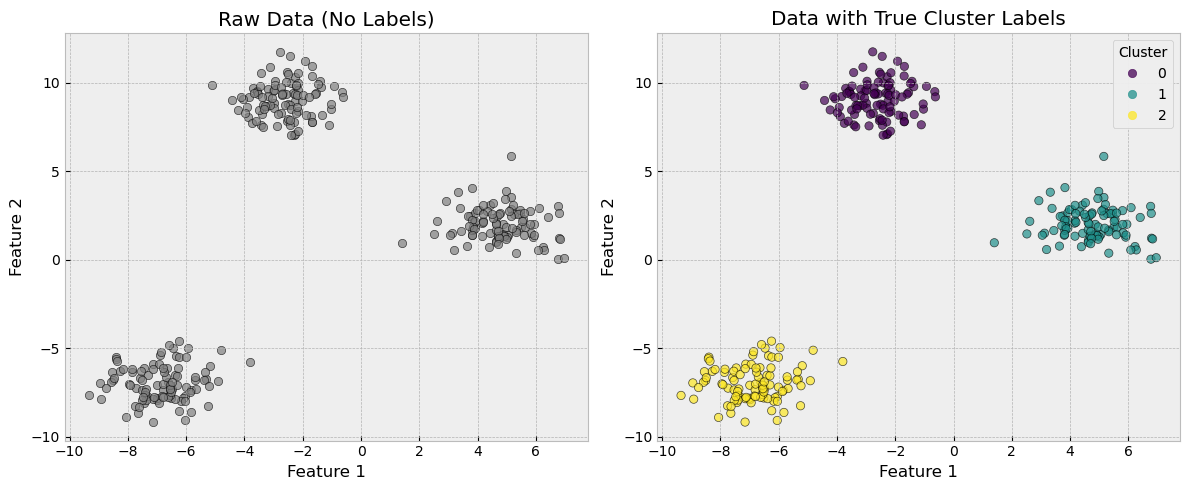

In [4]:
# Create a side-by-side subplot showing raw vs labeled data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Unlabeled raw data
axes[0].scatter(
    df["Feature 1"], df["Feature 2"], color="gray", edgecolor="black", alpha=0.7
)
axes[0].set_title("Raw Data (No Labels)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Plot 2: True cluster labels (for demonstration only)
scatter = axes[1].scatter(
    df["Feature 1"],
    df["Feature 2"],
    c=df["True Cluster"],
    # cmap="viridis",
    edgecolor="black",
    alpha=0.7,
)
axes[1].set_title("Data with True Cluster Labels")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# Optional: add a legend to the labeled plot
legend1 = axes[1].legend(*scatter.legend_elements(), title="Cluster")
axes[1].add_artist(legend1)

# Show the plot
plt.tight_layout()
plt.show()

### Step 3: Applying K-Means Clustering

Now that we've seen the data visually, it's time to let the K-Means algorithm do its job.

K-Means is an **unsupervised learning** algorithm, meaning it looks at the data *without* any labels and tries to group similar data points together. We told it to look for **3 clusters**, and it used that instruction to organize the points based on how close they are to each other.

Behind the scenes, K-Means:
1. Randomly picks 3 points to start as "centers" of clusters.
2. Assigns each data point to the nearest center.
3. Moves the centers to the middle of their assigned points.
4. Repeats the process until everything settles into place.

Now we’ll see what groupings it found—without having told it what the “true” clusters were.


In [5]:
def apply_kmeans(
    X: np.ndarray, n_clusters: int = 3, random_state: int = 42
) -> Tuple[np.ndarray, KMeans]:
    """
    Applies K-Means clustering to the input data.

    Args:
        X (np.ndarray): Feature matrix of shape (n_samples, n_features).
        n_clusters (int): The number of clusters to form.
        random_state (int): Seed for reproducibility.

    Returns:
        Tuple[np.ndarray, KMeans]: A tuple containing the predicted cluster labels and the fitted KMeans model.
    """
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

    # Fit the model to the data and predict cluster labels
    labels = kmeans.fit_predict(X)

    return labels, kmeans


# Apply K-Means to our data
predicted_labels, kmeans_model = apply_kmeans(X)

# Add the predicted labels to the DataFrame for visualization
df["Predicted Cluster"] = predicted_labels

# Preview the updated DataFrame
df.head()

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Feature 1  Feature 2  True Cluster  Predicted Cluster
0  -7.338988  -7.729954             2                  1
1  -7.740041  -7.264665             2                  1
2  -1.686653   7.793442             0                  2
3   4.422198   3.071947             1                  0
4  -8.917752  -7.888196             2                  1

### ⚠️ A Quick Note on Comparing Labels

When using clustering algorithms like K-Means, we have to be careful when comparing the predicted clusters to the original (true) groups.

Why? Because **K-Means assigns arbitrary labels** to clusters—cluster `0` in the output might actually correspond to group `2` in the real data. The algorithm doesn't know the "right" labels—it just finds groupings based on patterns.

So before checking if the predictions are “correct,” we need to **match the predicted labels** to the true labels in a way that makes the comparison fair. Once we do that, we can see how well the algorithm grouped similar data points together.


In [6]:
from scipy.stats import mode


def match_labels(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    """
    Maps predicted K-Means labels to match the true labels as closely as possible.

    Args:
        y_true (np.ndarray): The ground truth labels.
        y_pred (np.ndarray): The labels predicted by K-Means.

    Returns:
        np.ndarray: Remapped predicted labels that best match the true labels.
    """
    new_labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = y_pred == cluster
        new_labels[mask] = mode(y_true[mask], keepdims=True).mode[0]
    return new_labels


# Remap predicted labels to best match true labels
remapped_labels = match_labels(y_true, predicted_labels)

# Add a 'Correct' column: 1 if predicted label matches true label, else 0
df["Correct"] = (remapped_labels == y_true).astype(int)

# Optionally update Predicted Cluster to the remapped version
df["Predicted Cluster"] = remapped_labels

# Preview the updated DataFrame
df.head()

Feature 1  Feature 2  True Cluster  Predicted Cluster  Correct
0  -7.338988  -7.729954             2                  2        1
1  -7.740041  -7.264665             2                  2        1
2  -1.686653   7.793442             0                  0        1
3   4.422198   3.071947             1                  1        1
4  -8.917752  -7.888196             2                  2        1

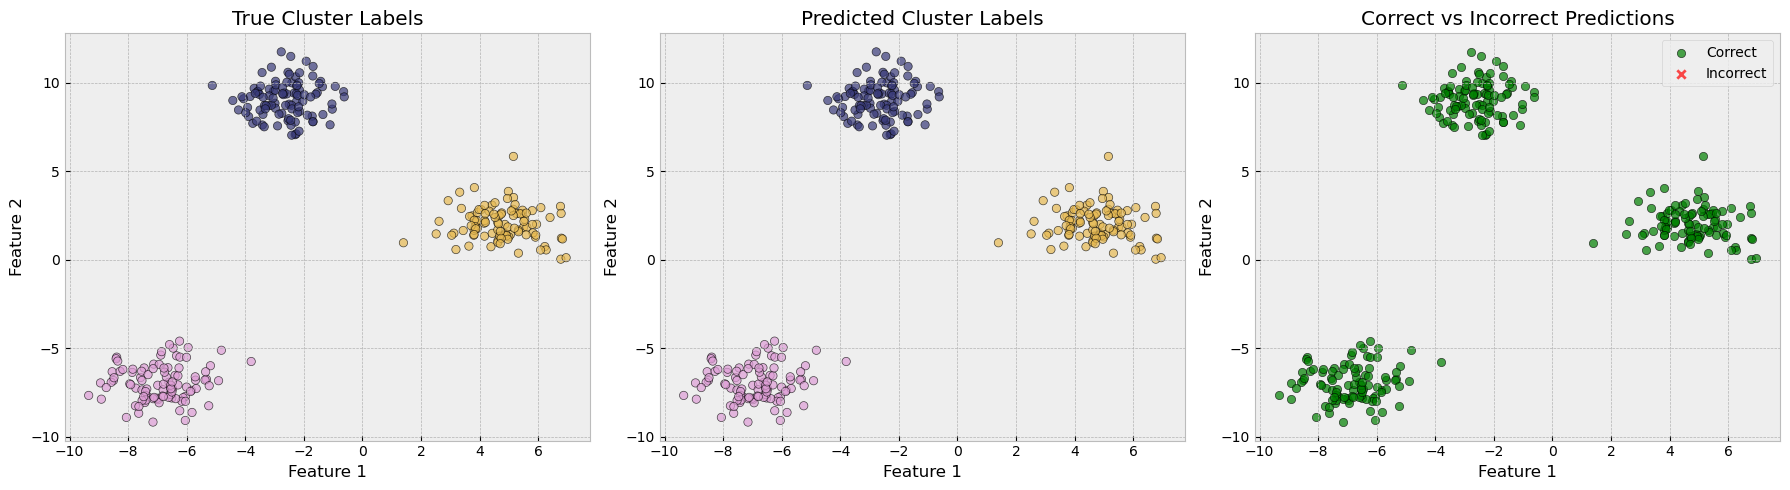

In [7]:
# Create a 1 row, 3 column subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: True cluster labels
axes[0].scatter(
    df["Feature 1"],
    df["Feature 2"],
    c=df["True Cluster"],
    cmap="tab20b",
    edgecolor="black",
    alpha=0.7,
)
axes[0].set_title("True Cluster Labels")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Plot 2: Predicted cluster labels
axes[1].scatter(
    df["Feature 1"],
    df["Feature 2"],
    c=df["Predicted Cluster"],
    cmap="tab20b",
    edgecolor="black",
    alpha=0.7,
)
axes[1].set_title("Predicted Cluster Labels")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# Plot 3: Errors (green dots for correct, red crosses for incorrect)
correct_mask = df["Correct"] == 1
incorrect_mask = df["Correct"] == 0

# Plot correct predictions in green
axes[2].scatter(
    df["Feature 1"][correct_mask],
    df["Feature 2"][correct_mask],
    color="green",
    label="Correct",
    alpha=0.7,
    edgecolor="black",
)

# Plot incorrect predictions in red (as crosses)
axes[2].scatter(
    df["Feature 1"][incorrect_mask],
    df["Feature 2"][incorrect_mask],
    color="red",
    marker="x",
    label="Incorrect",
    alpha=0.7,
)

axes[2].set_title("Correct vs Incorrect Predictions")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

___
## Dummy example 2

In [8]:
# Generate the tricky dataset
X_tricky, y_true_tricky = generate_dummy_data(
    n_samples=1000, n_features=2, n_clusters=5, cluster_std=2.0, random_state=1337
)

# Convert to DataFrame for easier handling and visualization
df_tricky = pd.DataFrame(X_tricky, columns=["Feature 1", "Feature 2"])
df_tricky["True Cluster"] = y_true_tricky

# Show the first few rows
df_tricky.head()

Feature 1  Feature 2  True Cluster
0  -4.025469  -4.589211             0
1  -6.844591   7.936632             3
2  -2.228593   0.341056             2
3  -6.180282   1.765046             2
4  -1.910380   9.264535             3

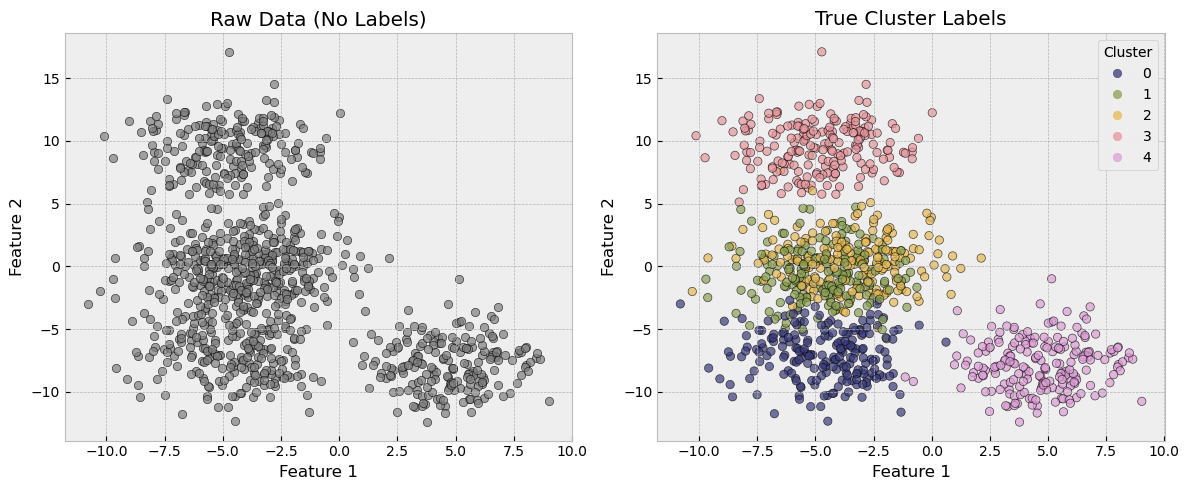

In [9]:
# Create a 1 row, 2 column subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Raw data (no labels)
axes[0].scatter(
    df_tricky["Feature 1"],
    df_tricky["Feature 2"],
    color="gray",
    edgecolor="black",
    alpha=0.7,
)
axes[0].set_title("Raw Data (No Labels)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Plot 2: True cluster labels (colored)
scatter = axes[1].scatter(
    df_tricky["Feature 1"],
    df_tricky["Feature 2"],
    c=df_tricky["True Cluster"],
    cmap="tab20b",
    edgecolor="black",
    alpha=0.7,
)
axes[1].set_title("True Cluster Labels")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# Add a legend to the second plot
legend1 = axes[1].legend(*scatter.legend_elements(), title="Cluster")
axes[1].add_artist(legend1)

# Show the plots
plt.tight_layout()
plt.show()

In [10]:
# Apply K-Means to our data
predicted_labels, kmeans_model = apply_kmeans(X_tricky)

# Add the predicted labels to the DataFrame for visualization
df_tricky["Predicted Cluster"] = predicted_labels

# Remap predicted labels to best match true labels
remapped_labels = match_labels(y_true_tricky, predicted_labels)

# Add a 'Correct' column: 1 if predicted label matches true label, else 0
df_tricky["Correct"] = (remapped_labels == y_true_tricky).astype(int)

# Optionally update Predicted Cluster to the remapped version
df_tricky["Predicted Cluster"] = remapped_labels

# Preview the updated DataFrame
display(df_tricky.head())

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Feature 1  Feature 2  True Cluster  Predicted Cluster  Correct
0  -4.025469  -4.589211             0                  0        1
1  -6.844591   7.936632             3                  3        1
2  -2.228593   0.341056             2                  0        0
3  -6.180282   1.765046             2                  0        0
4  -1.910380   9.264535             3                  3        1

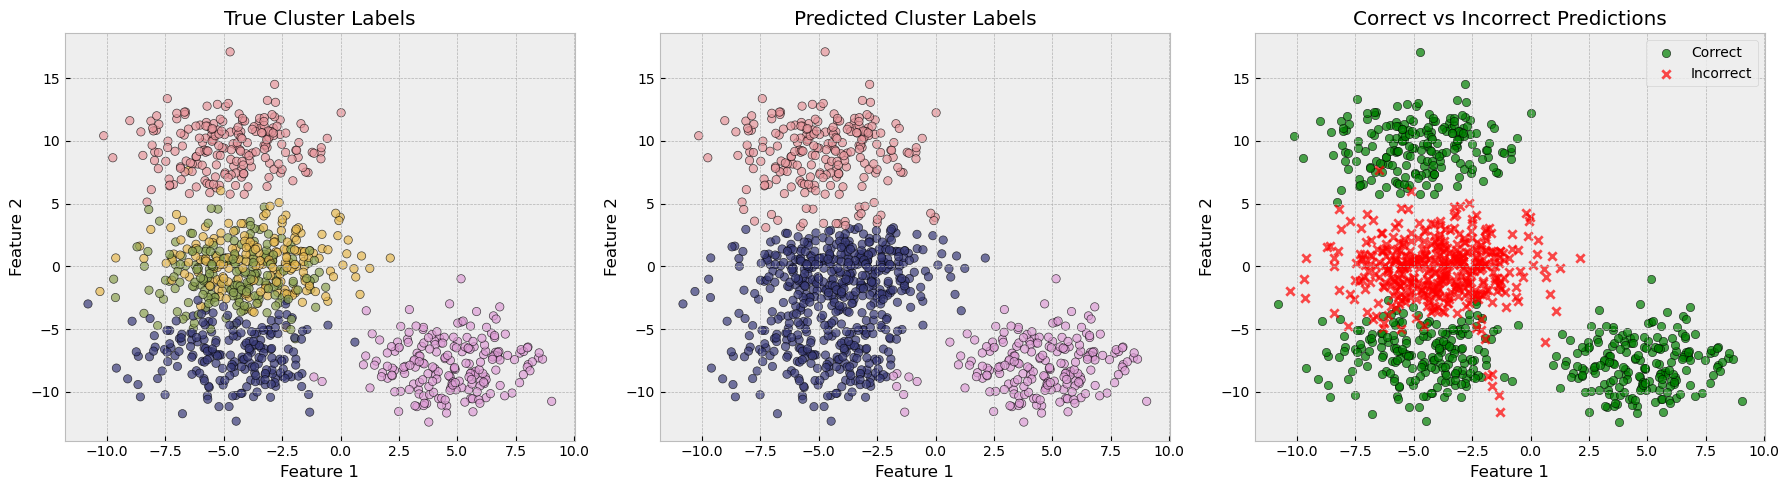

In [11]:
# Create a 1 row, 3 column subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: True cluster labels
axes[0].scatter(
    df_tricky["Feature 1"],
    df_tricky["Feature 2"],
    c=df_tricky["True Cluster"],
    cmap="tab20b",
    edgecolor="black",
    alpha=0.7,
)
axes[0].set_title("True Cluster Labels")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Plot 2: Predicted cluster labels
axes[1].scatter(
    df_tricky["Feature 1"],
    df_tricky["Feature 2"],
    c=df_tricky["Predicted Cluster"],
    cmap="tab20b",
    edgecolor="black",
    alpha=0.7,
)
axes[1].set_title("Predicted Cluster Labels")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# Plot 3: Errors (green dots for correct, red crosses for incorrect)
correct_mask = df_tricky["Correct"] == 1
incorrect_mask = df_tricky["Correct"] == 0

# Plot correct predictions in green
axes[2].scatter(
    df_tricky["Feature 1"][correct_mask],
    df_tricky["Feature 2"][correct_mask],
    color="green",
    label="Correct",
    alpha=0.7,
    edgecolor="black",
)

# Plot incorrect predictions in red (as crosses)
axes[2].scatter(
    df_tricky["Feature 1"][incorrect_mask],
    df_tricky["Feature 2"][incorrect_mask],
    color="red",
    marker="x",
    label="Incorrect",
    alpha=0.7,
)

axes[2].set_title("Correct vs Incorrect Predictions")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


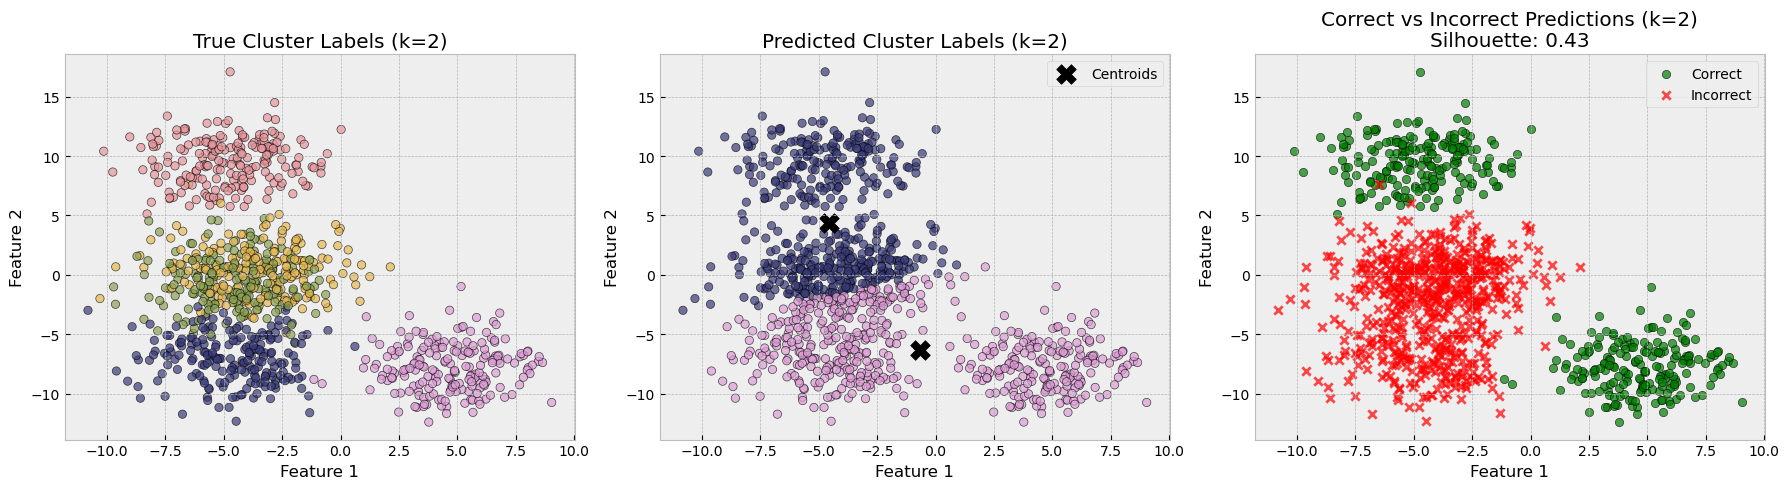

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


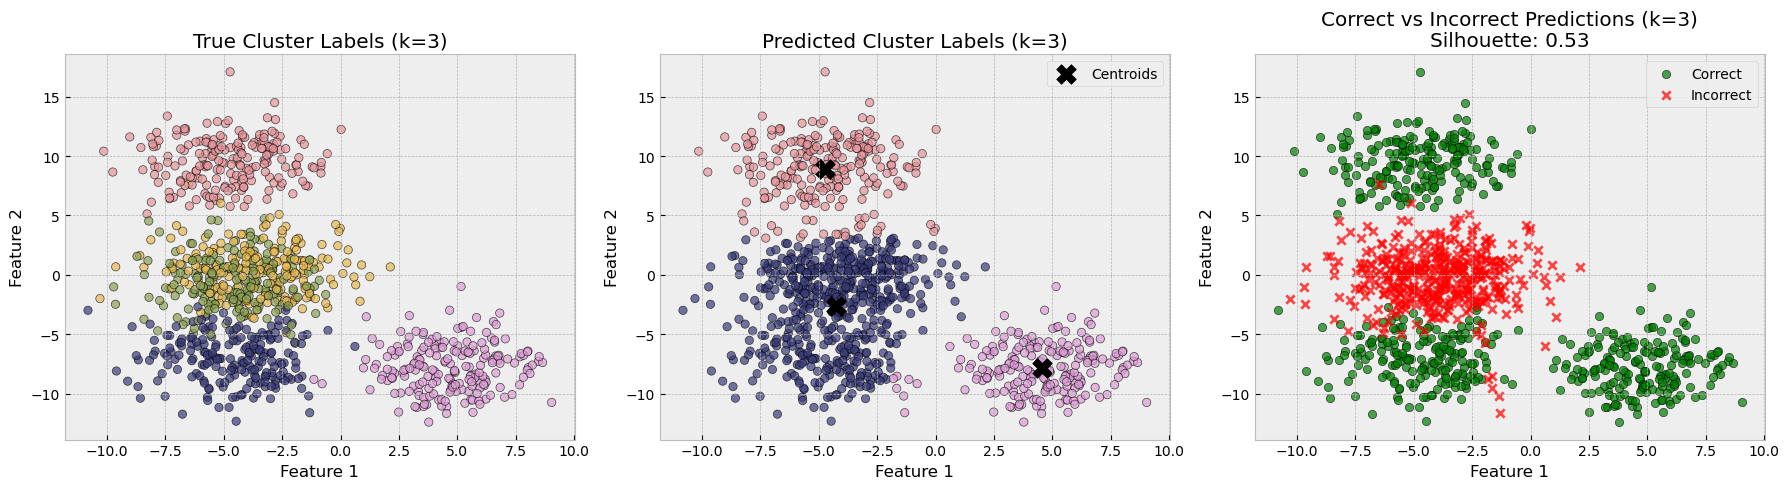

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


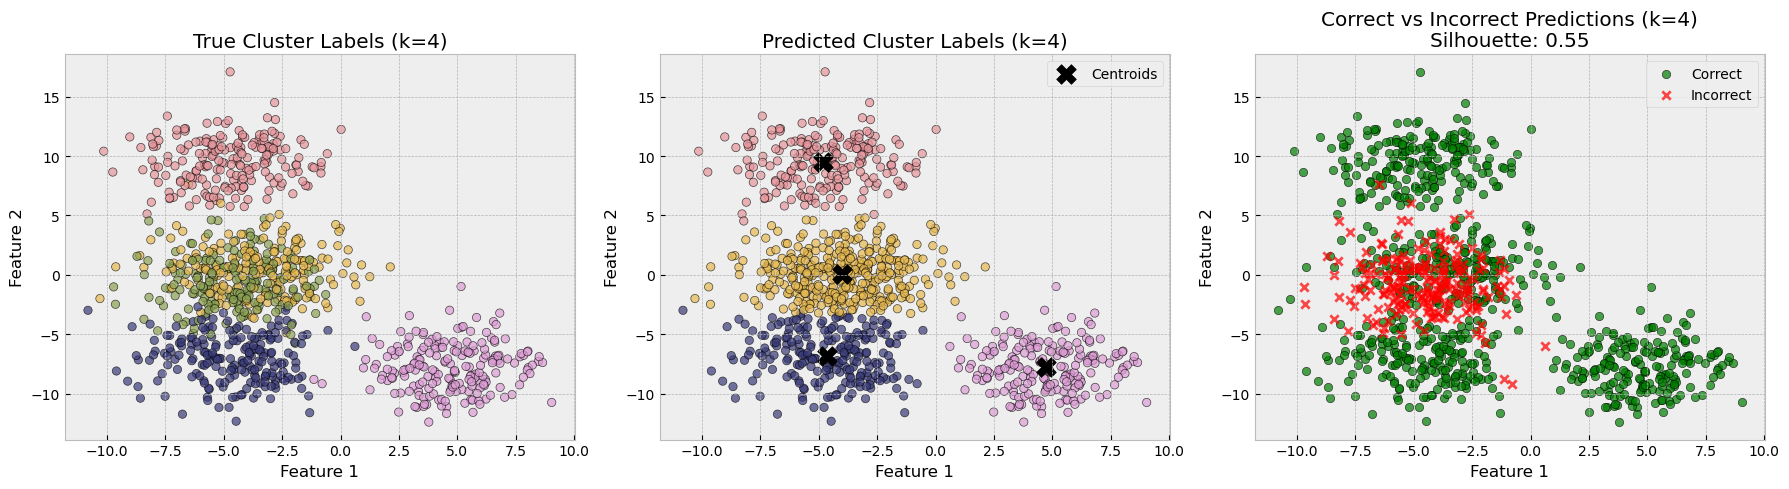

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


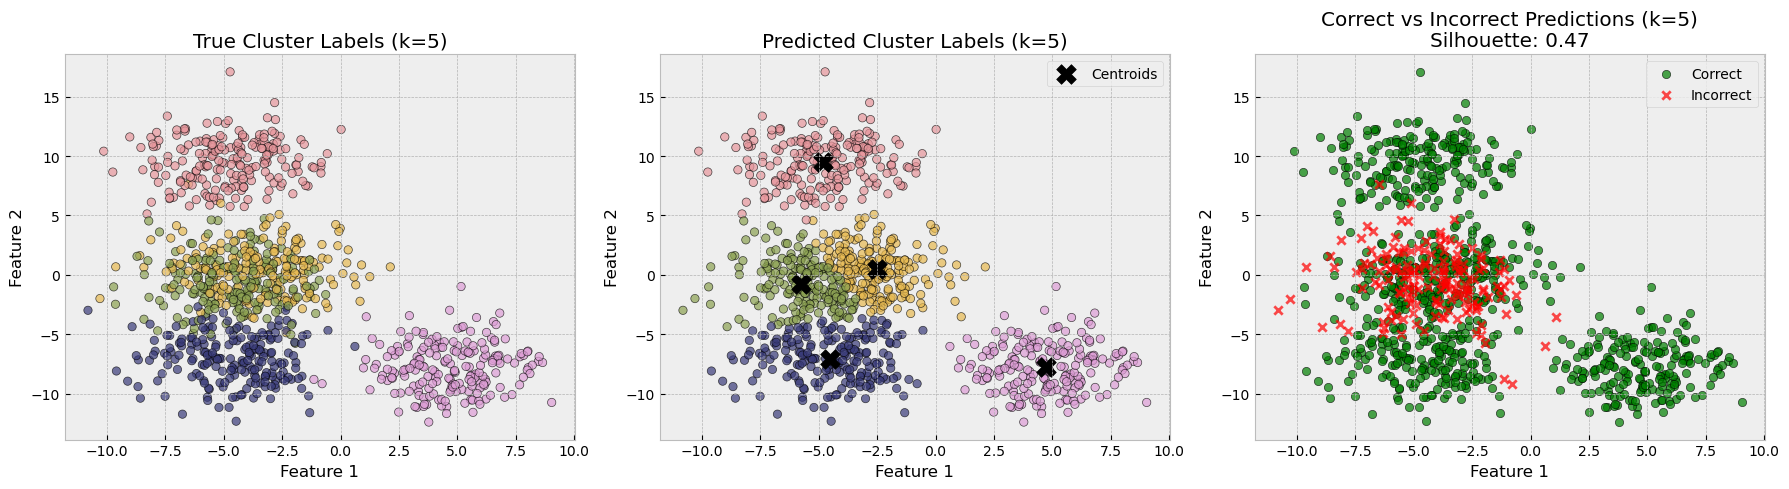

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


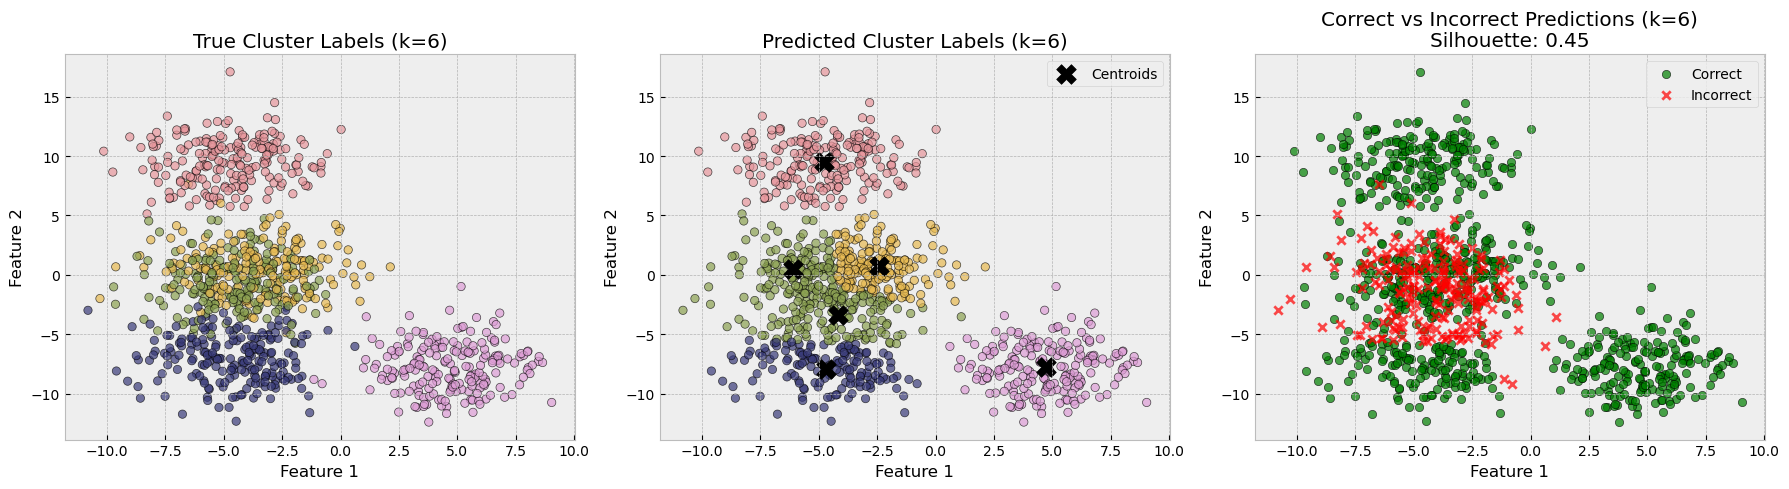

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


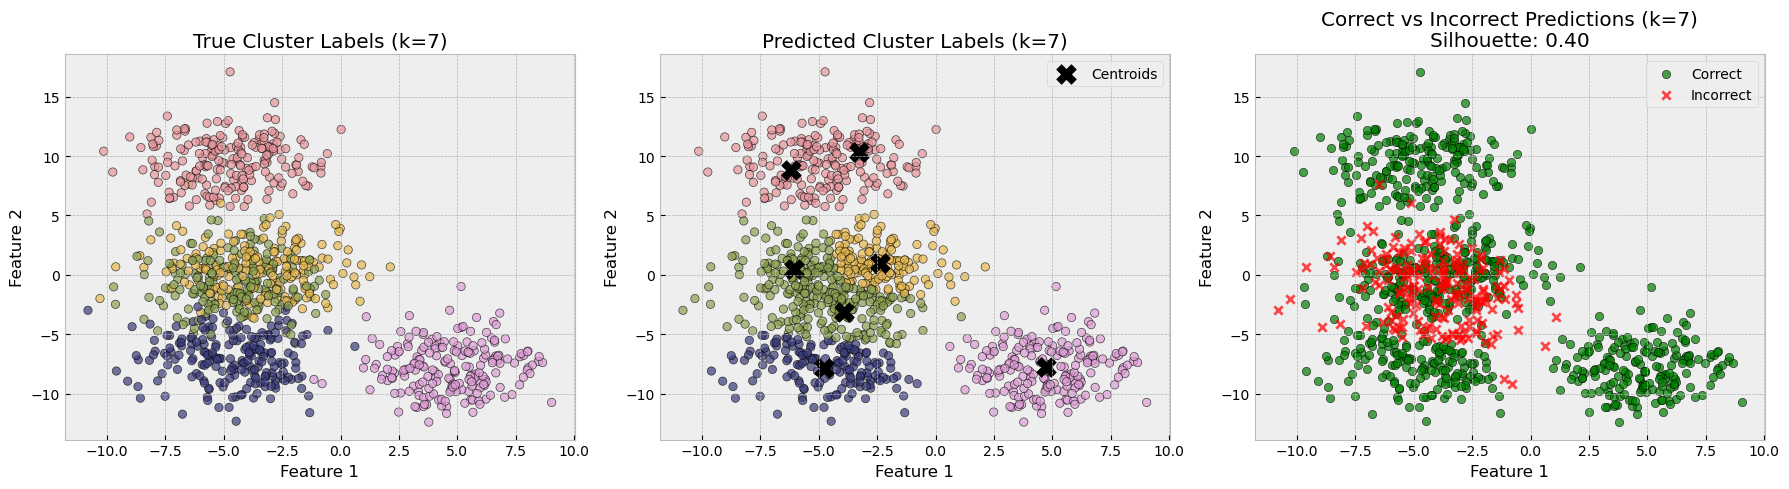

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


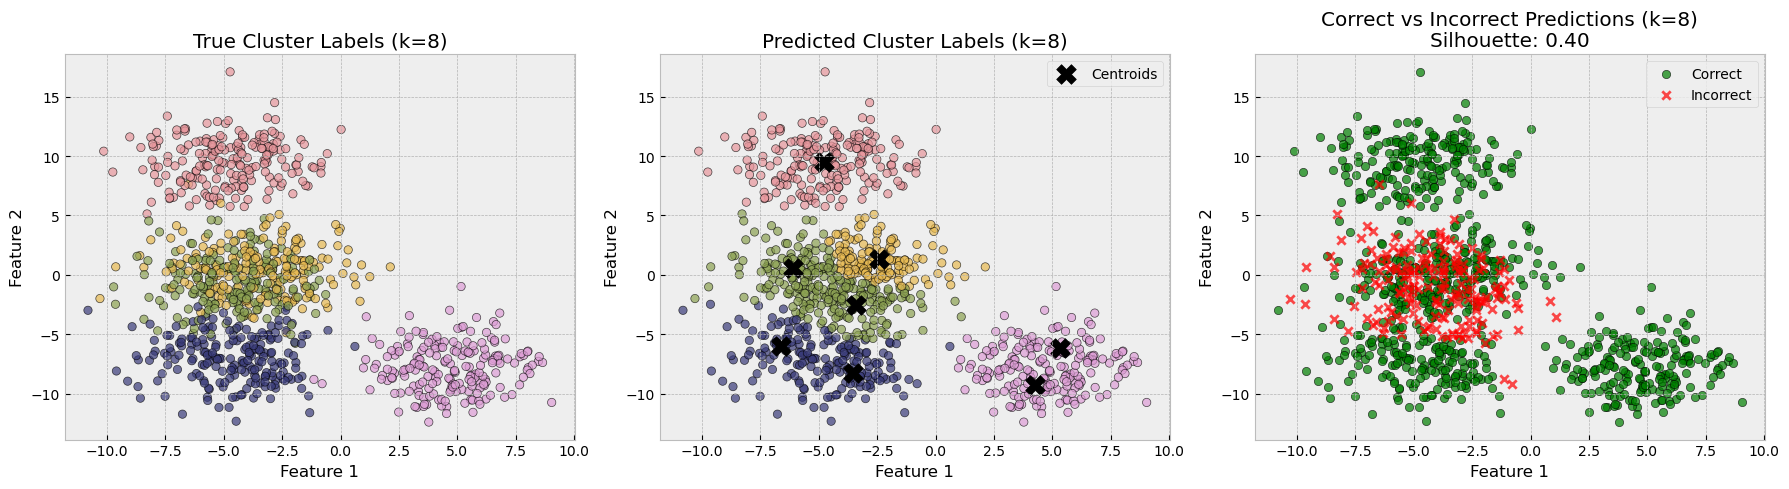

In [12]:
from sklearn.metrics import silhouette_score

# loop cap
MAX_CLUSTERS = 9

# Create a list to store silhouette scores
silhouette_scores = []
# and WCSS values
wcss = []

# Create a for loop to test different numbers of clusters (from 2 to 10)
for n_clusters in range(2, MAX_CLUSTERS):
    # Apply K-Means with the current number of clusters
    predicted_labels, kmeans_model = apply_kmeans(X_tricky, n_clusters=n_clusters)

    # Remap predicted labels to best match true labels
    remapped_labels = match_labels(y_true_tricky, predicted_labels)

    # Add a 'Correct' column: 1 if predicted label matches true label, else 0
    df_tricky["Correct"] = (remapped_labels == y_true_tricky).astype(int)

    # Optionally update Predicted Cluster to the remapped version
    df_tricky["Predicted Cluster"] = remapped_labels

    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_tricky, predicted_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate the Within-Cluster Sum of Squares (WCSS)
    wcss_value = kmeans_model.inertia_
    wcss.append(wcss_value)

    # Create a 1 row, 3 column subplot
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Plot 1: True cluster labels
    axes[0].scatter(
        df_tricky["Feature 1"],
        df_tricky["Feature 2"],
        c=df_tricky["True Cluster"],
        edgecolor="black",
        cmap="tab20b",
        alpha=0.7,
    )
    axes[0].set_title(f"True Cluster Labels (k={n_clusters})")
    axes[0].set_xlabel("Feature 1")
    axes[0].set_ylabel("Feature 2")

    # Plot 2: Predicted cluster labels
    axes[1].scatter(
        df_tricky["Feature 1"],
        df_tricky["Feature 2"],
        c=df_tricky["Predicted Cluster"],
        cmap="tab20b",
        edgecolor="black",
        alpha=0.7,
    )
    axes[1].set_title(f"Predicted Cluster Labels (k={n_clusters})")
    axes[1].set_xlabel("Feature 1")
    axes[1].set_ylabel("Feature 2")

    # Plot centroids on the third plot (larger and distinct marker)
    centroids = kmeans_model.cluster_centers_
    axes[1].scatter(
        centroids[:, 0],
        centroids[:, 1],
        color="black",
        marker="X",
        s=200,
        label="Centroids",
    )
    axes[1].legend()

    # Plot 3: Errors (green dots for correct, red crosses for incorrect)
    correct_mask = df_tricky["Correct"] == 1
    incorrect_mask = df_tricky["Correct"] == 0

    # Plot correct predictions in green
    axes[2].scatter(
        df_tricky["Feature 1"][correct_mask],
        df_tricky["Feature 2"][correct_mask],
        color="green",
        label="Correct",
        alpha=0.7,
        edgecolor="black",
    )

    # Plot incorrect predictions in red (as crosses)
    axes[2].scatter(
        df_tricky["Feature 1"][incorrect_mask],
        df_tricky["Feature 2"][incorrect_mask],
        color="red",
        marker="x",
        label="Incorrect",
        alpha=0.7,
    )

    axes[2].set_title(
        f"Correct vs Incorrect Predictions (k={n_clusters})\nSilhouette: {silhouette_avg:.2f}"
    )
    axes[2].set_xlabel("Feature 1")
    axes[2].set_ylabel("Feature 2")
    axes[2].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

## Evaluation

### Silhouette Score

The **Silhouette Score** is a measure used to evaluate the quality of a clustering result. It tells us how well each data point has been grouped relative to other clusters. Here's how to think about it:

1. **Calculation**: 
   - For each data point, the score calculates how similar it is to points within its own cluster (**cohesion**) compared to how similar it is to points in the nearest neighboring cluster (**separation**).
   - The score for each point is between -1 and 1:
     - **A score closer to 1** indicates that the point is well-matched to its own cluster and poorly matched to neighboring clusters.
     - **A score closer to 0** means that the point is on or near the boundary of its cluster, indicating weaker cohesion or separation.
     - **A negative score** suggests that the point may have been incorrectly assigned to its cluster (it’s closer to points in a neighboring cluster).

2. **Interpreting the Score**:
   - A **higher silhouette score** means better clustering: points are well-clustered and far away from other clusters.
   - A **lower silhouette score** means poorer clustering: points are either poorly matched to their cluster or there is too much overlap between clusters.

3. **Why Use It?**:
   - The silhouette score helps us choose the optimal number of clusters. If you try multiple clustering configurations (e.g., 2, 3, 4, ... clusters), the number of clusters that maximizes the silhouette score is often considered the best choice.
   - It’s especially useful when the structure of the data isn't clear, and we want to ensure that the clusters we identify are meaningful and well-separated.

4. **Alternatives**:
   - **Inertia** (or **Sum of Squared Distances to Centroids**): Measures how tight the clusters are but doesn’t account for how well-separated they are.
   - **Davies-Bouldin Index**: A measure of cluster compactness and separation, but typically less intuitive than the silhouette score.
   - **Calinski-Harabasz Index**: Evaluates cluster density and separation, but it may not be as reliable when the clusters are of varying sizes.

In summary, the silhouette score is a valuable tool for understanding the effectiveness of our clustering. A higher score typically means a better clustering configuration, making it a key indicator in selecting the best model.

[Silhouette Score](https://miro.medium.com/v2/resize:fit:960/1*N3Xm52bELqrju_DWLqjyHg.jpeg)


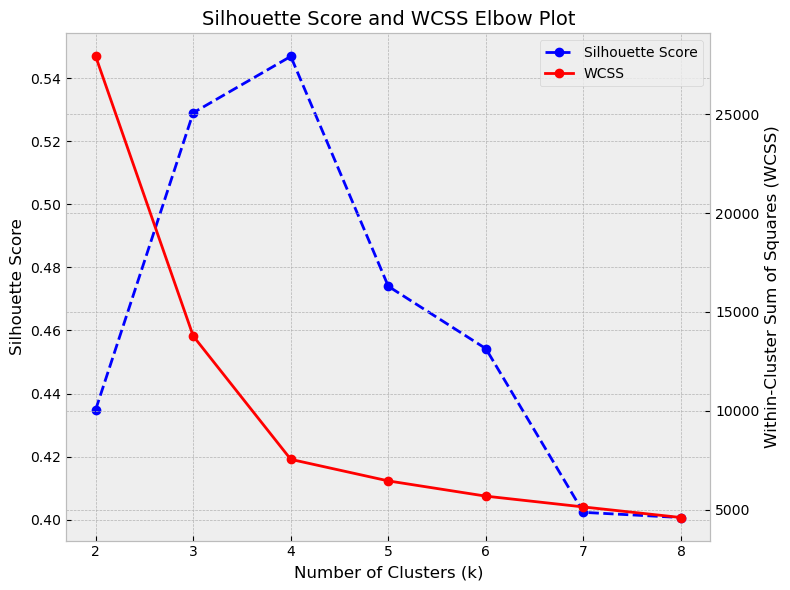

In [13]:
# Create an elbow plot for silhouette scores
fig, ax1 = plt.subplots(figsize=(8, 6))
# Plot Silhouette Scores on the left axis
ax1.plot(
    range(2, MAX_CLUSTERS),
    silhouette_scores,
    marker="o",
    color="b",
    linestyle="--",
    label="Silhouette Score",
)
ax1.set_xlabel("Number of Clusters (k)", fontsize=12)
ax1.set_ylabel("Silhouette Score", fontsize=12)
ax1.tick_params(axis="y")

# Create another axis for the WCSS plot
ax2 = ax1.twinx()
ax2.plot(
    range(2, MAX_CLUSTERS), wcss, marker="o", color="r", linestyle="-", label="WCSS"
)
ax2.set_ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)
ax2.tick_params(axis="y")

# Add a title and legend
ax1.set_title("Silhouette Score and WCSS Elbow Plot", fontsize=14)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.show()

___
## Example 3 - credit card customer data

In [14]:
df = pd.read_csv("./data/CC GENERAL.csv")

print("First few rows: ")
display(df.head())
print()
print("Info about data types:")
display(df.info())
print()
print("Summary statistics: ")
display(df.describe().T)
print()

First few rows: 


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12


Info about data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-nu

None


Summary statistics: 


count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

### ⚠️ Potential prep steps we'll need:
1. Drop CUST_ID — Not useful for clustering.
2. Handle missing values — MINIMUM_PAYMENTS has some missing entries.
3. Feature scaling — Large variance in monetary features (e.g. BALANCE, PAYMENTS).
4. Outliers — Some extremely high values in PURCHASES, CASH_ADVANCE, etc.
5. Optional: Feature engineering for domain clarity (e.g., ratios like BALANCE/CREDIT_LIMIT).

Here are some engineered features that would add value:

| New Feature           | Formula                                                                 | Rationale                                                    |
|-----------------------|-------------------------------------------------------------------------|--------------------------------------------------------------|
| BALANCE_RATIO         | BALANCE / CREDIT_LIMIT                                                  | Gives context to how much of the credit is being used        |
| PAYMENT_RATIO         | PAYMENTS / MINIMUM_PAYMENTS                                             | Higher ratios may indicate more responsible customers        |
| AVG_PURCHASE          | PURCHASES / PURCHASES_TRX                                               | Useful for comparing high-frequency vs. high-ticket buyers   |
| CASH_ADVANCE_RATIO    | CASH_ADVANCE / BALANCE                                                  | Reveals reliance on cash advances                            |
| TOTAL_PURCHASES_FREQ  | ONEOFF_PURCHASES_FREQUENCY + PURCHASES_INSTALLMENTS_FREQUENCY          | Total engagement in purchases                                |
| INSTALLMENT_SHARE     | INSTALLMENTS_PURCHASES / PURCHASES                                     | Indicates preference for financing purchases                 |

In [15]:
# Create a working copy of the original dataset
df_seg = df.copy()

# Drop identifier column
df_seg.drop(columns=["CUST_ID"], inplace=True)

# Handle missing values early (we'll impute properly later)
df_seg["MINIMUM_PAYMENTS"].replace(0, np.nan, inplace=True)
df_seg["CREDIT_LIMIT"].replace(0, np.nan, inplace=True)
df_seg["PURCHASES_TRX"].replace(0, np.nan, inplace=True)
df_seg["BALANCE"].replace(0, np.nan, inplace=True)

# Create engineered features
df_seg["BALANCE_RATIO"] = df_seg["BALANCE"] / df_seg["CREDIT_LIMIT"]
df_seg["PAYMENT_RATIO"] = df_seg["PAYMENTS"] / df_seg["MINIMUM_PAYMENTS"]
df_seg["AVG_PURCHASE"] = df_seg["PURCHASES"] / df_seg["PURCHASES_TRX"]
df_seg["CASH_ADVANCE_RATIO"] = df_seg["CASH_ADVANCE"] / df_seg["BALANCE"]
df_seg["TOTAL_PURCHASES_FREQ"] = (
    df_seg["ONEOFF_PURCHASES_FREQUENCY"] + df_seg["PURCHASES_INSTALLMENTS_FREQUENCY"]
)
df_seg["INSTALLMENT_SHARE"] = df_seg["INSTALLMENTS_PURCHASES"] / df_seg["PURCHASES"]

# Drop the original columns that are now redundant
columns_to_drop = [
    "BALANCE",
    "PAYMENTS",
    "CREDIT_LIMIT",
    "MINIMUM_PAYMENTS",
    "CASH_ADVANCE",
    "PURCHASES",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "PURCHASES_TRX",
    "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY",
]
df_seg.drop(columns=columns_to_drop, inplace=True)

# Keep useful original features
# These are kept as they carry independent behavioral signal
keep_features = [
    "BALANCE_FREQUENCY",
    "PURCHASES_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY",
    "CASH_ADVANCE_TRX",
    "PRC_FULL_PAYMENT",
    "TENURE",
]
# No need to drop these since we're keeping them

# Preview the transformed DataFrame
display(df_seg.head())

BALANCE_FREQUENCY  PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0           0.818182             0.166667                0.000000   
1           0.909091             0.000000                0.250000   
2           1.000000             1.000000                0.000000   
3           0.636364             0.083333                0.083333   
4           1.000000             0.083333                0.000000   

   CASH_ADVANCE_TRX  PRC_FULL_PAYMENT  TENURE  BALANCE_RATIO  PAYMENT_RATIO  \
0                 0          0.000000      12       0.040901       1.446508   
1                 4          0.222222      12       0.457495       3.826241   
2                 0          0.000000      12       0.332687       0.991682   
3                 1          0.000000      12       0.222223            NaN   
4                 0          0.000000      12       0.681429       2.771075   

   AVG_PURCHASE  CASH_ADVANCE_RATIO  TOTAL_PURCHASES_FREQ  INSTALLMENT_SHARE  
0     47.700000            0.000000              0.083333                1.0  
1           NaN            2.011869              0.000000                NaN  
2     64.430833            0.000000              1.000000                0.0  
3   1499.000000            0.123473              0.083333                0.0  
4     16.000000            0.000000              0.083333                0.0

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


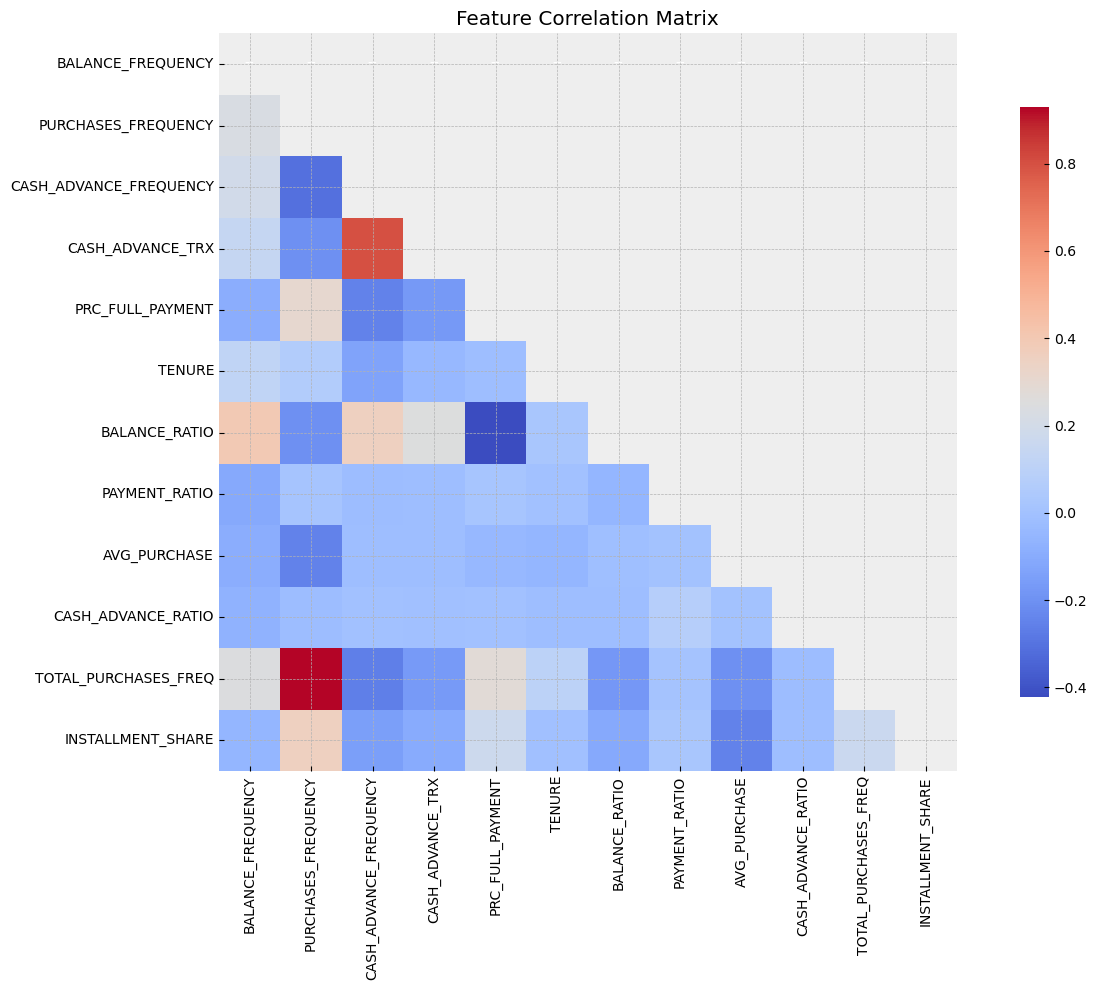

Highly correlated feature pairs (|corr| > 0.85):
  PURCHASES_FREQUENCY <--> TOTAL_PURCHASES_FREQ : 0.93


In [16]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_seg.corr()

# Set figure size
plt.figure(figsize=(14, 10))

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    mask=np.triu(corr_matrix),  # Show only lower triangle
)
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print out highly correlated pairs above threshold (excluding self-correlation)
threshold = 0.85
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > threshold:
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], round(corr_val, 2))
            high_corr_pairs.append(pair)

# Display correlated feature pairs
if high_corr_pairs:
    print("Highly correlated feature pairs (|corr| > 0.85):")
    for f1, f2, val in high_corr_pairs:
        print(f"  {f1} <--> {f2} : {val}")
else:
    print("No highly correlated feature pairs found.")

In [17]:
# Drop redundant features based on correlation
features_to_drop = [
    "TOTAL_PURCHASES_FREQ",  # Highly correlated with PURCHASES_FREQUENCY
]

df_seg.drop(columns=features_to_drop, inplace=True)

# Final list of features retained
print("Final list of features in df_seg:")
print(df_seg.columns.tolist())

Final list of features in df_seg:
['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PRC_FULL_PAYMENT', 'TENURE', 'BALANCE_RATIO', 'PAYMENT_RATIO', 'AVG_PURCHASE', 'CASH_ADVANCE_RATIO', 'INSTALLMENT_SHARE']


In [18]:
print("Info about data types:")
display(df_seg.info())
print()
print("Summary statistics: ")
display(df_seg.describe(include="all").T.round(4))
print()

Info about data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BALANCE_FREQUENCY       8950 non-null   float64
 1   PURCHASES_FREQUENCY     8950 non-null   float64
 2   CASH_ADVANCE_FREQUENCY  8950 non-null   float64
 3   CASH_ADVANCE_TRX        8950 non-null   int64  
 4   PRC_FULL_PAYMENT        8950 non-null   float64
 5   TENURE                  8950 non-null   int64  
 6   BALANCE_RATIO           8869 non-null   float64
 7   PAYMENT_RATIO           8637 non-null   float64
 8   AVG_PURCHASE            6906 non-null   float64
 9   CASH_ADVANCE_RATIO      8870 non-null   float64
 10  INSTALLMENT_SHARE       6908 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 769.3 KB


None


Summary statistics: 


count     mean        std     min      25%      50%  \
BALANCE_FREQUENCY       8950.0   0.8773     0.2369  0.0000   0.8889   1.0000   
PURCHASES_FREQUENCY     8950.0   0.4904     0.4014  0.0000   0.0833   0.5000   
CASH_ADVANCE_FREQUENCY  8950.0   0.1351     0.2001  0.0000   0.0000   0.0000   
CASH_ADVANCE_TRX        8950.0   3.2488     6.8246  0.0000   0.0000   0.0000   
PRC_FULL_PAYMENT        8950.0   0.1537     0.2925  0.0000   0.0000   0.0000   
TENURE                  8950.0  11.5173     1.3383  6.0000  12.0000  12.0000   
BALANCE_RATIO           8869.0   0.3924     0.3897  0.0000   0.0442   0.3076   
PAYMENT_RATIO           8637.0   9.3501   120.2869  0.0007   0.9575   2.1705   
AVG_PURCHASE            6906.0  95.7345   176.9256  0.0000  33.0012  55.4492   
CASH_ADVANCE_RATIO      8870.0  23.8483  1099.9236  0.0000   0.0000   0.0000   
INSTALLMENT_SHARE       6908.0      inf        NaN  0.0000   0.0000   0.4865   

                            75%         max  
BALANCE_FREQUENCY        1.0000      1.0000  
PURCHASES_FREQUENCY      0.9167      1.0000  
CASH_ADVANCE_FREQUENCY   0.2222      1.5000  
CASH_ADVANCE_TRX         4.0000    123.0000  
PRC_FULL_PAYMENT         0.1429      1.0000  
TENURE                  12.0000     12.0000  
BALANCE_RATIO            0.7216     15.9100  
PAYMENT_RATIO            6.2604   6840.5289  
AVG_PURCHASE            94.5643   5981.6667  
CASH_ADVANCE_RATIO       0.7797  84285.6719  
INSTALLMENT_SHARE        1.0000         inf

In [19]:
from sklearn.preprocessing import StandardScaler

# Step 1: Handle Missing Values
df_seg["BALANCE_RATIO"].fillna(df_seg["BALANCE_RATIO"].median(), inplace=True)
df_seg["PAYMENT_RATIO"].fillna(df_seg["PAYMENT_RATIO"].median(), inplace=True)
df_seg["AVG_PURCHASE"].fillna(df_seg["AVG_PURCHASE"].median(), inplace=True)
df_seg["CASH_ADVANCE_RATIO"].fillna(df_seg["CASH_ADVANCE_RATIO"].median(), inplace=True)

# Handle `inf` values by replacing them with NaN, then imputing them
df_seg["INSTALLMENT_SHARE"].replace(np.inf, np.nan, inplace=True)
df_seg["INSTALLMENT_SHARE"].fillna(df_seg["INSTALLMENT_SHARE"].median(), inplace=True)

### Why Do We Need to Scale Features for K-Means Clustering?

#### 1. **Distance-Based Algorithms**
K-Means is a **distance-based algorithm**, which means it groups data based on how **close or far apart** points are from each other. It uses **Euclidean distance** (straight-line distance) to measure similarity.

#### 2. **Different Units of Measurement**
In our dataset, some features are measured in **different units**. For example:
- **BALANCE_FREQUENCY** might range from 0 to 1 (percentage or ratio).
- **PURCHASES_FREQUENCY** might also range from 0 to 1.
- **CASH_ADVANCE_TRX** could be in whole numbers (e.g., 1, 5, 10).
- **BALANCE** might range from hundreds to thousands.

If we don’t scale these features, those with larger ranges (like **BALANCE**) will dominate the distance calculation because the algorithm will give them more weight, even if those features aren’t necessarily more important for clustering.

#### 3. **Equal Contribution of All Features**
Scaling helps ensure that **every feature contributes equally** to the clustering process.
- **Without scaling**, features with larger values (like **BALANCE**) will dominate the calculation, while smaller values (like **PURCHASES_FREQUENCY**) may be **ignored** or given less importance, even though they may be just as valuable for identifying clusters.
- **With scaling**, each feature will have a similar range (mean = 0, std = 1), so the algorithm treats all features equally, leading to more meaningful clusters.

#### 4. **Improved Performance**
Scaling **improves the convergence** of the K-Means algorithm, helping it **find optimal clusters** faster and more accurately.

#### 5. **Interpretability**
When features are scaled, it’s easier to interpret which features contribute the most to the **cluster centroids** (i.e., which features are most important for differentiating the clusters).

### Key Takeaways:
- **K-Means relies on distances** between data points, and without scaling, features with larger numerical ranges dominate the distance calculations.
- **Scaling ensures fair contribution** from all features, leading to better clustering results.
- **Standardization (mean = 0, std = 1)** ensures that each feature has equal importance in determining cluster characteristics.


In [20]:
# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
df_seg_scaled = scaler.fit_transform(df_seg)

# Check for NaN values after imputation and scaling
if np.any(np.isnan(df_seg_scaled)):
    print("There are still missing values after imputation.")
else:
    print("Preprocessing complete: no missing values.")

Preprocessing complete: no missing values.


c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvs

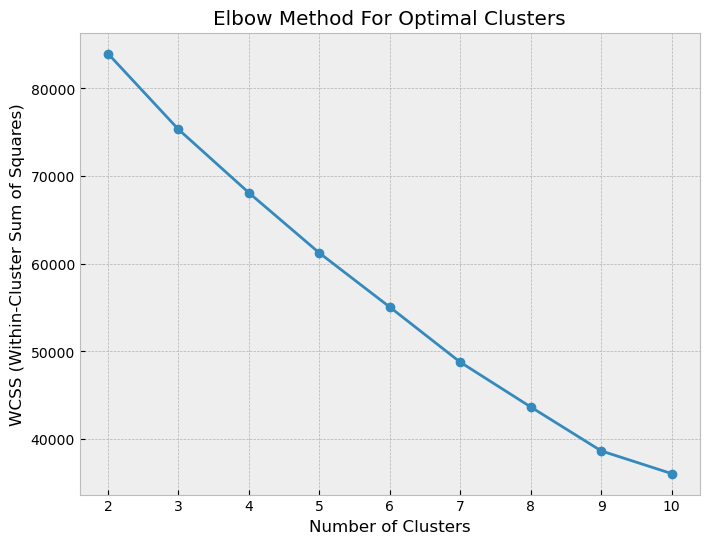

In [21]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for n_clusters in range(2, 11):
    predicted_labels, kmeans_model = apply_kmeans(df_seg_scaled, n_clusters)
    # Calculate Within-Cluster Sum of Squares (WCSS)
    wcss.append(kmeans_model.inertia_)

# Plot the elbow graph to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method For Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tvs

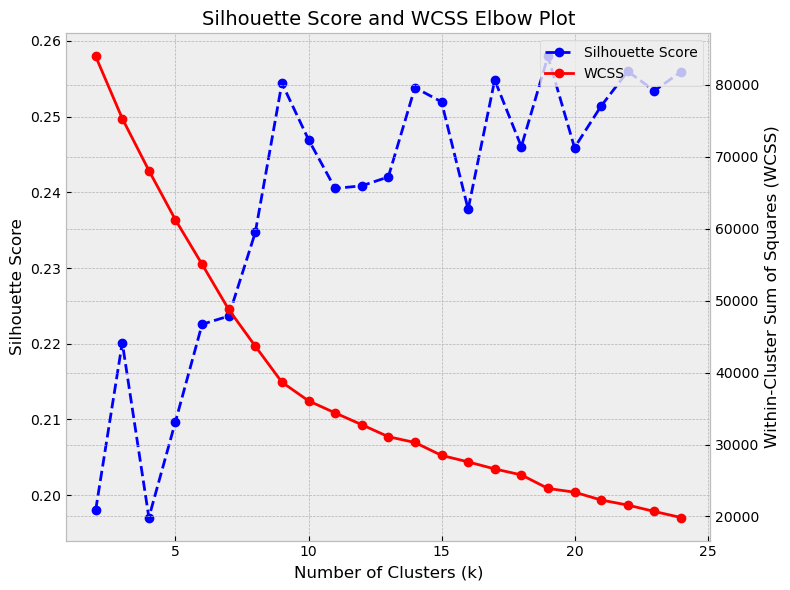

In [22]:
# loop cap
MAX_CLUSTERS = 25

# Create a list to store silhouette scores
silhouette_scores = []
# and WCSS values
wcss = []

for n_clusters in range(2, MAX_CLUSTERS):
    # Apply K-Means with the current number of clusters
    predicted_labels, kmeans_model = apply_kmeans(df_seg_scaled, n_clusters=n_clusters)

    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(df_seg_scaled, predicted_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate the Within-Cluster Sum of Squares (WCSS)
    wcss_value = kmeans_model.inertia_
    wcss.append(wcss_value)

# Create an elbow plot for silhouette scores
fig, ax1 = plt.subplots(figsize=(8, 6))
# Plot Silhouette Scores on the left axis
ax1.plot(
    range(2, MAX_CLUSTERS),
    silhouette_scores,
    marker="o",
    color="b",
    linestyle="--",
    label="Silhouette Score",
)
ax1.set_xlabel("Number of Clusters (k)", fontsize=12)
ax1.set_ylabel("Silhouette Score", fontsize=12)
ax1.tick_params(axis="y")

# Create another axis for the WCSS plot
ax2 = ax1.twinx()
ax2.plot(
    range(2, MAX_CLUSTERS), wcss, marker="o", color="r", linestyle="-", label="WCSS"
)
ax2.set_ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)
ax2.tick_params(axis="y")

# Add a title and legend
ax1.set_title("Silhouette Score and WCSS Elbow Plot", fontsize=14)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.show()

In [23]:
predicted_labels, kmeans_model = apply_kmeans(df_seg_scaled, n_clusters=6)

clusters = pd.concat([df_seg, pd.DataFrame({"cluster": predicted_labels})], axis=1)
clusters.head()

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


BALANCE_FREQUENCY  PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0           0.818182             0.166667                0.000000   
1           0.909091             0.000000                0.250000   
2           1.000000             1.000000                0.000000   
3           0.636364             0.083333                0.083333   
4           1.000000             0.083333                0.000000   

   CASH_ADVANCE_TRX  PRC_FULL_PAYMENT  TENURE  BALANCE_RATIO  PAYMENT_RATIO  \
0                 0          0.000000      12       0.040901       1.446508   
1                 4          0.222222      12       0.457495       3.826241   
2                 0          0.000000      12       0.332687       0.991682   
3                 1          0.000000      12       0.222223       2.170495   
4                 0          0.000000      12       0.681429       2.771075   

   AVG_PURCHASE  CASH_ADVANCE_RATIO  INSTALLMENT_SHARE  cluster  
0     47.700000            0.000000           1.000000        1  
1     55.449167            2.011869           0.486254        4  
2     64.430833            0.000000           0.000000        1  
3   1499.000000            0.123473           0.000000        5  
4     16.000000            0.000000           0.000000        4

c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tvsii\anaconda3\envs\quant\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

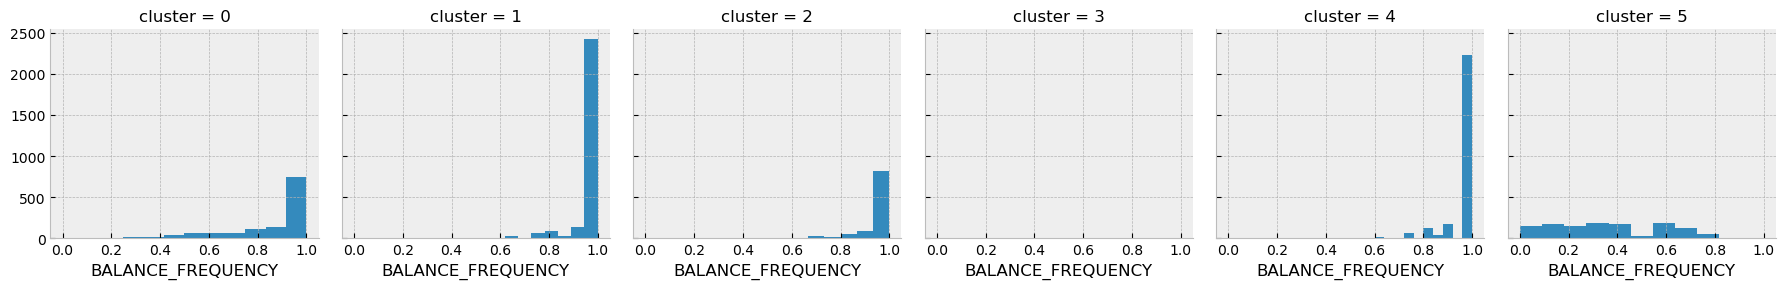

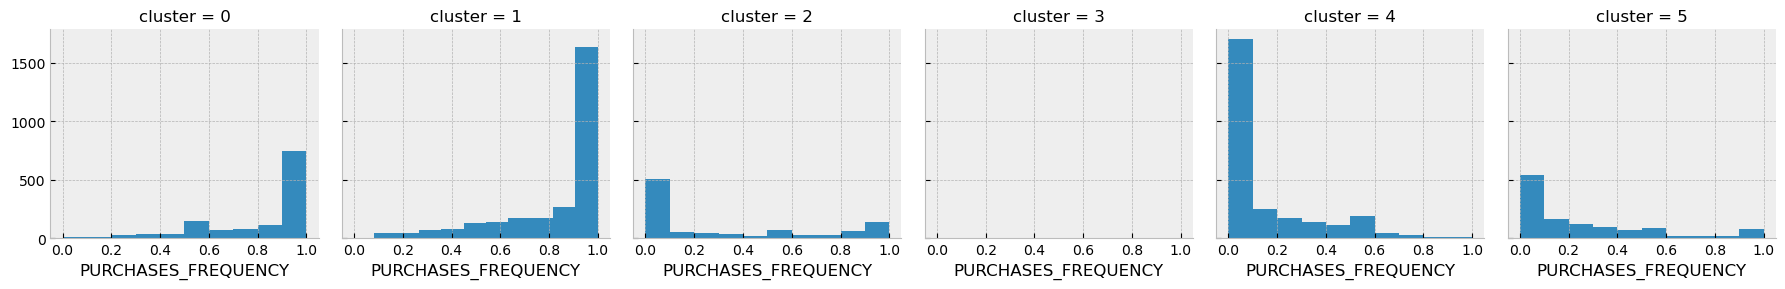

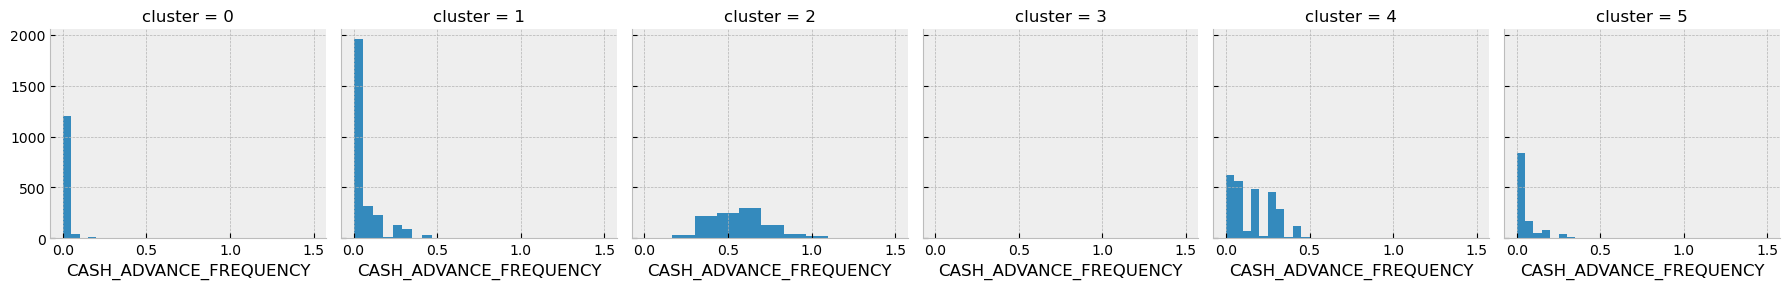

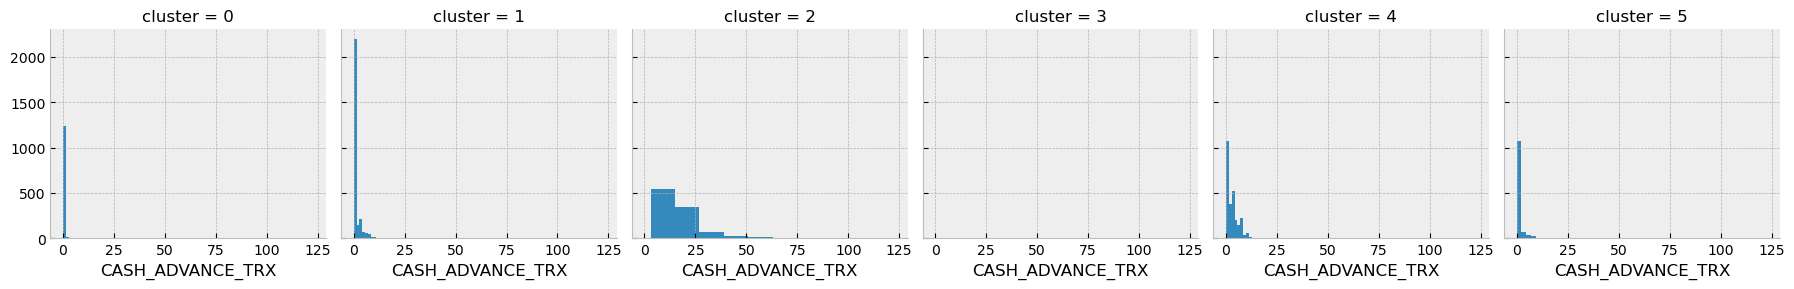

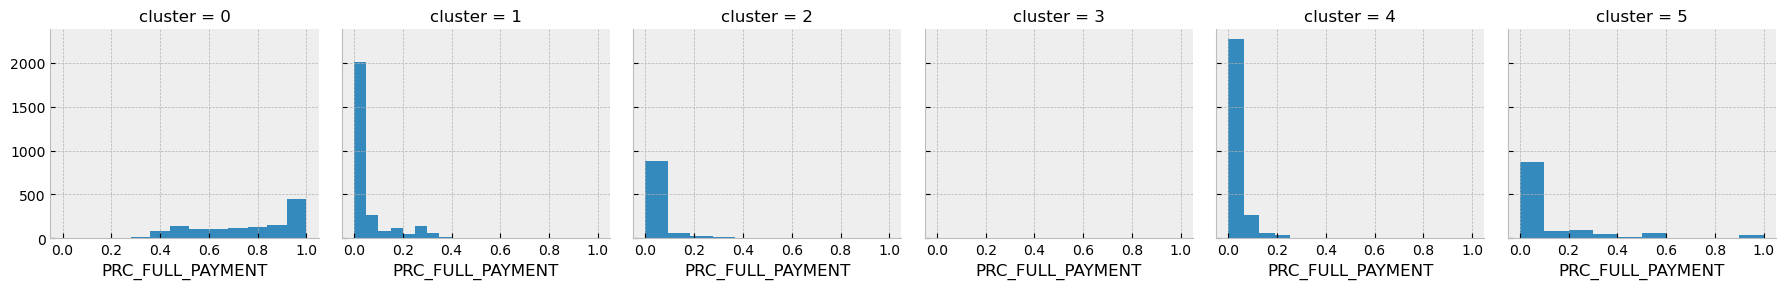

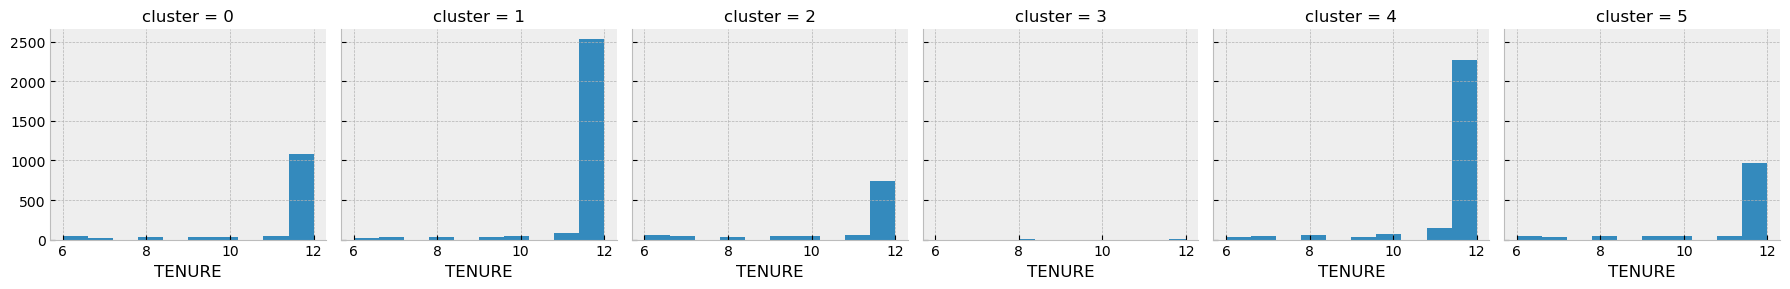

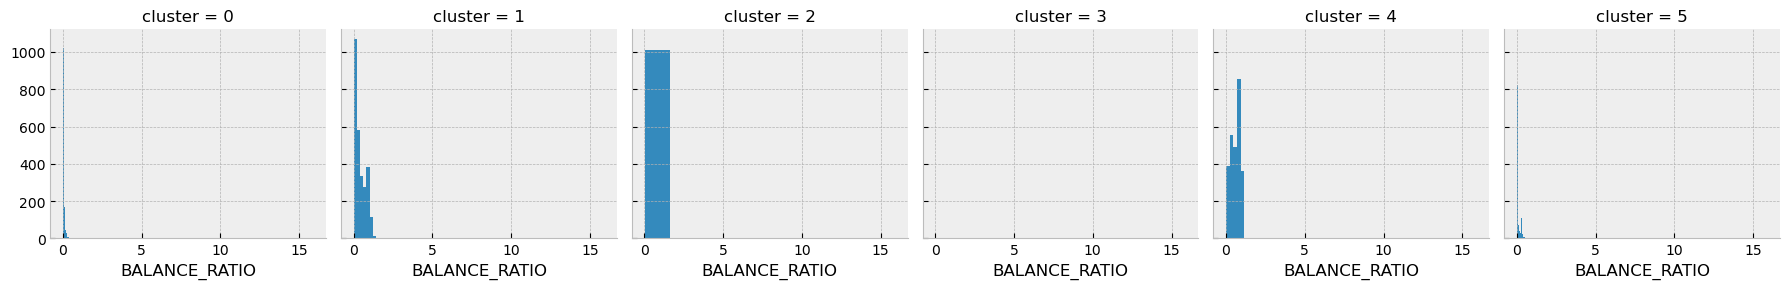

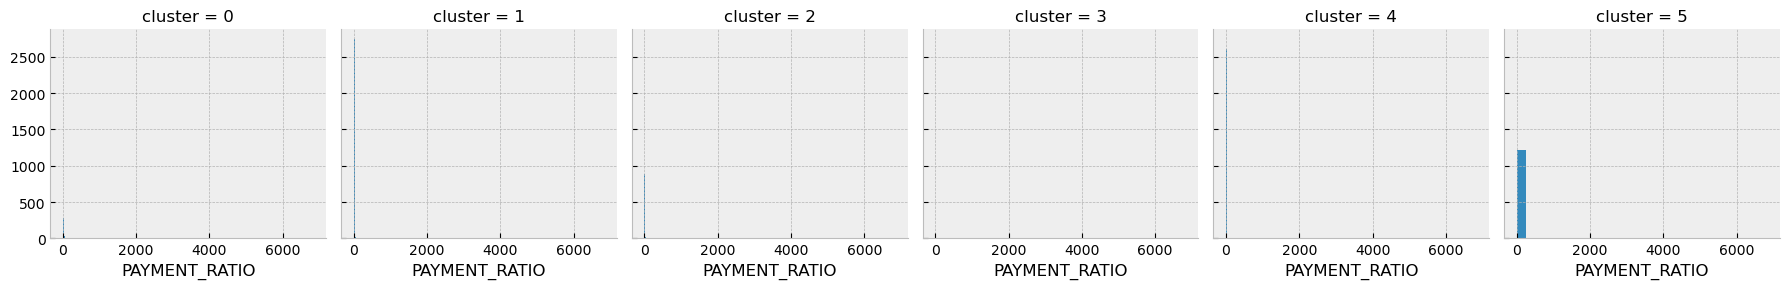

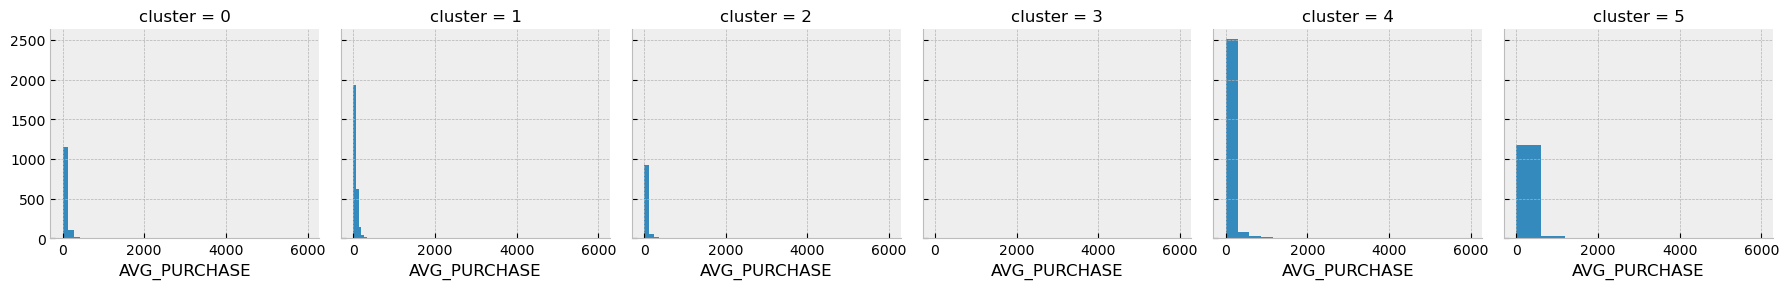

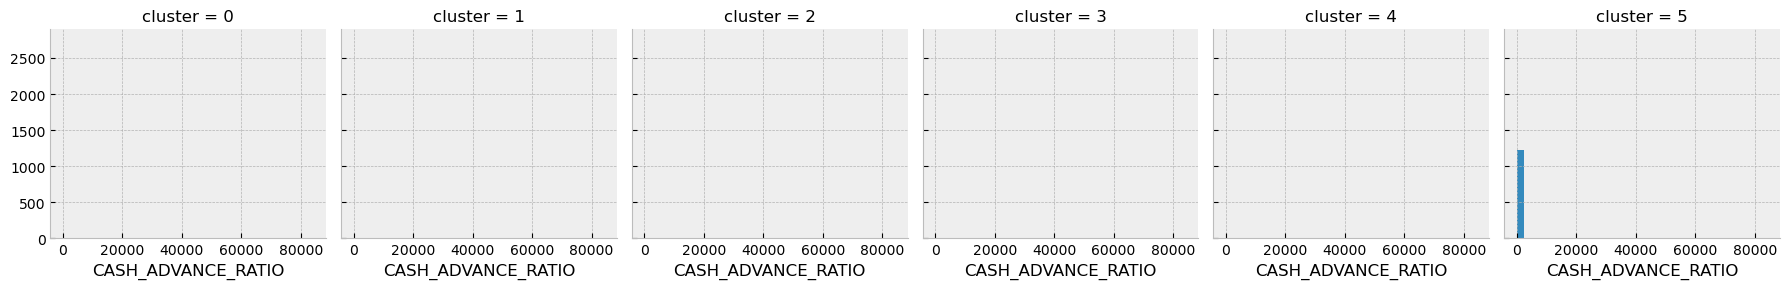

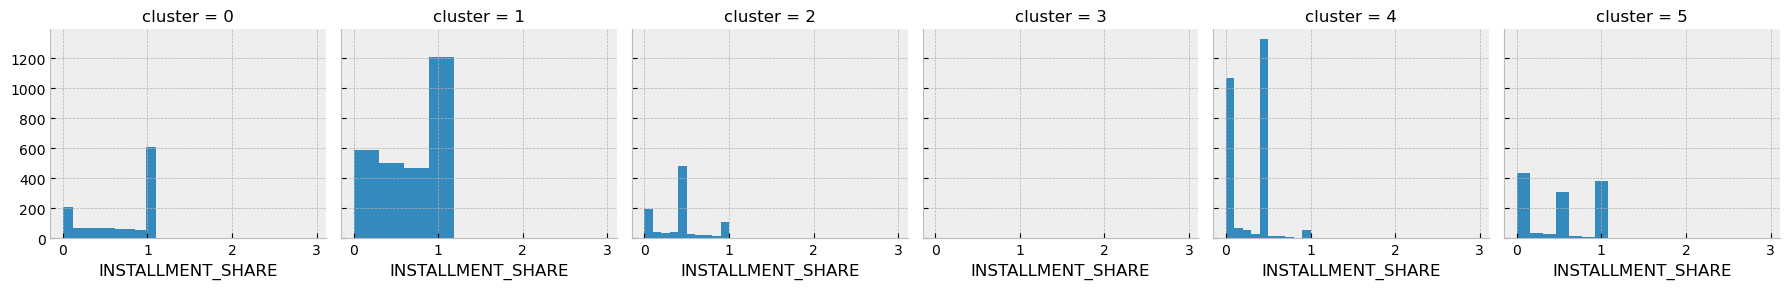

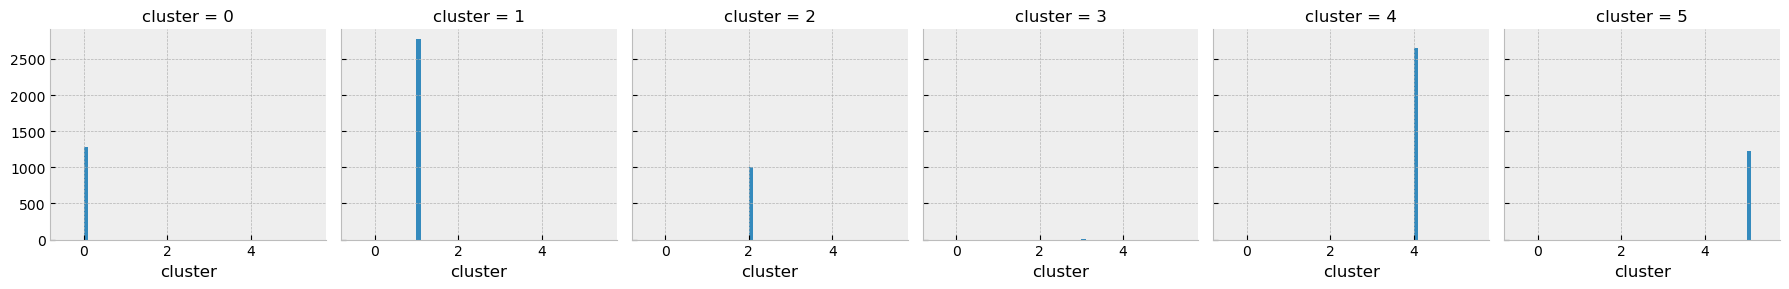

In [24]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col="cluster")
    grid.map(plt.hist, c)

(8950, 2)
0
1
2
3
4
5


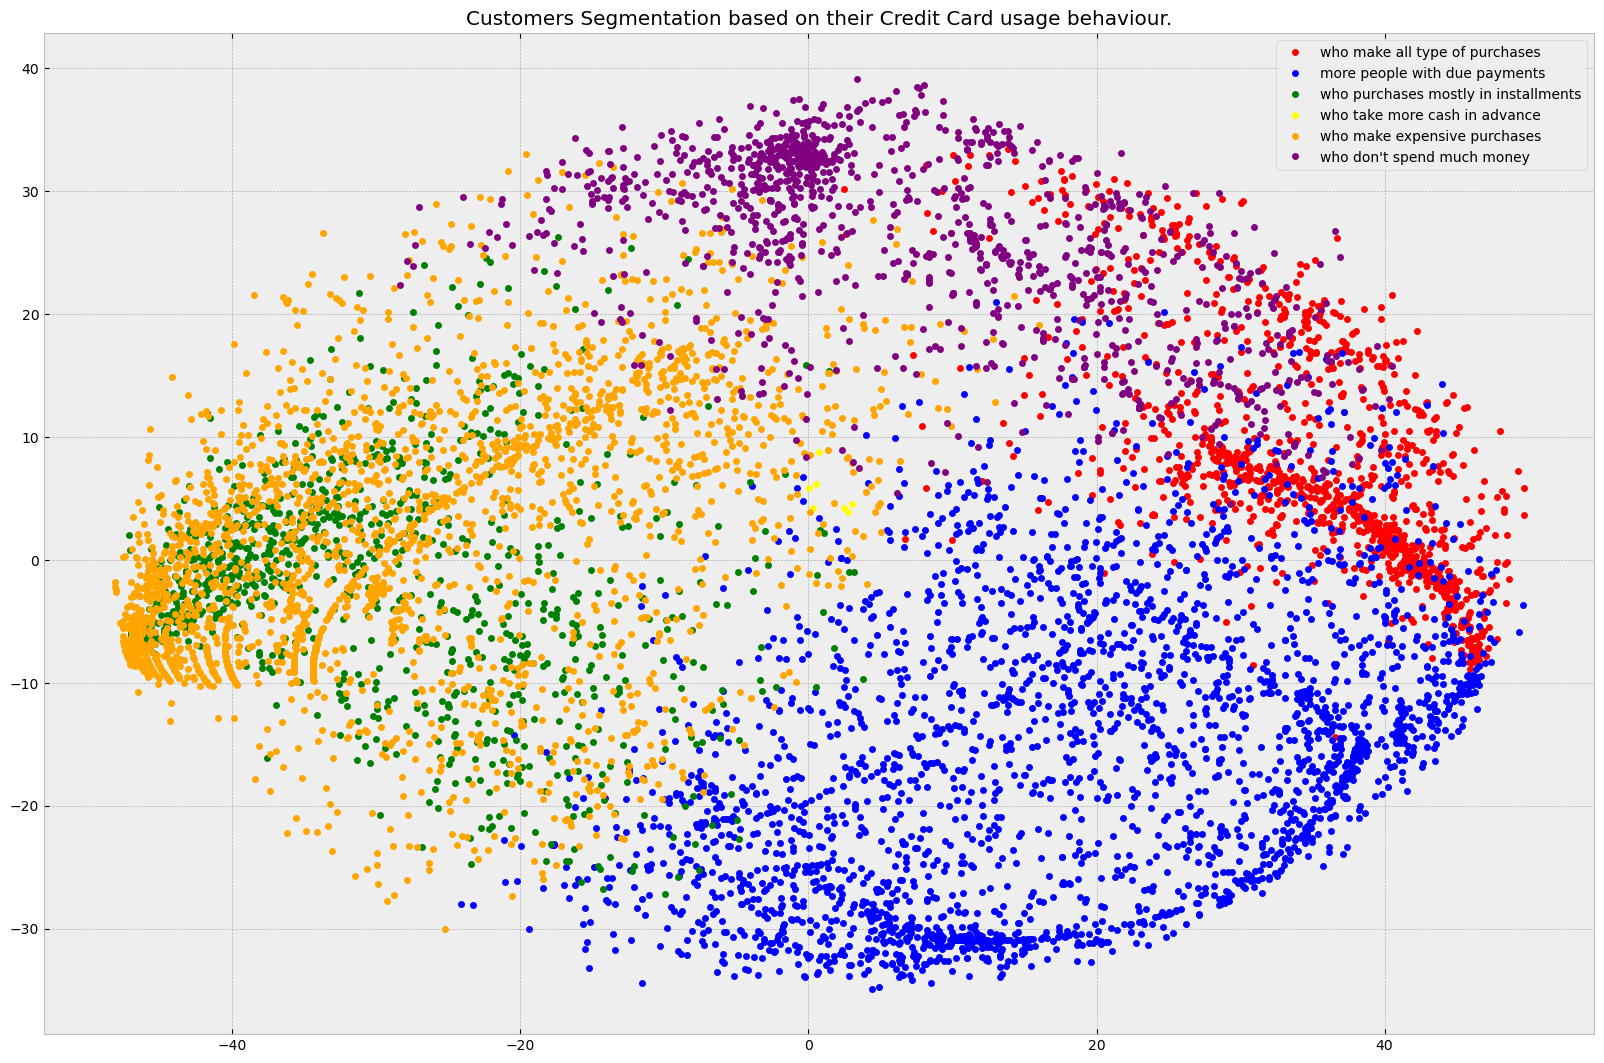

In [25]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


dist = 1 - cosine_similarity(df_seg_scaled)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
print(X_PCA.shape)

x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: "red", 1: "blue", 2: "green", 3: "yellow", 4: "orange", 5: "purple"}

names = {
    0: "who make all type of purchases",
    1: "more people with due payments",
    2: "who purchases mostly in installments",
    3: "who take more cash in advance",
    4: "who make expensive purchases",
    5: "who don't spend much money",
}

df = pd.DataFrame({"x": x, "y": y, "label": predicted_labels})
groups = df.groupby("label")

fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
    print(name)
    ax.plot(
        group.x,
        group.y,
        marker="o",
        linestyle="",
        ms=5,
        mec="none",
        color=colors[name],
        label=names[name],
    )
    ax.set_aspect("auto")
    ax.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")
    ax.tick_params(axis="y", which="both", left="off", top="off", labelleft="off")

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()